In [1]:
import os

In [2]:
with open('scenario_1_ped_right.txt', 'r') as file:
    lines = file.readlines()

In [3]:
len(lines)

782040

In [4]:
lines[:50]

['Initialized global random generator with seed 9.92468e+08\n',
 'Connect to server ...\n',
 '++++++++++++++++++++++ ROUND 0 ++++++++++++++++++++\n',
 'Initial message received\n',
 'Set number of pedestrians in scene = 4\n',
 'Starting...\n',
 'Episode Length: 400\n',
 '(-137.211, 22.6223)\n',
 '(-137.404, 22.417)\n',
 '(-137.611, 22.2264)\n',
 '(-137.823, 22.012)\n',
 '(-137.979, 21.8496)\n',
 '(-138.164, 21.6545)\n',
 '(-138.308, 21.5018)\n',
 '(-138.465, 21.3671)\n',
 '(-138.674, 21.1662)\n',
 '(-138.882, 20.9671)\n',
 '(-139.088, 20.7698)\n',
 '(-139.289, 20.5675)\n',
 '(-139.485, 20.3648)\n',
 '(-139.677, 20.1681)\n',
 '(-139.87, 19.9646)\n',
 '(-140.061, 19.7684)\n',
 '(-140.223, 19.6295)\n',
 '(-140.383, 19.4918)\n',
 '(-140.584, 19.2819)\n',
 '(-140.787, 19.0794)\n',
 '(-140.937, 18.9273)\n',
 '(-141.123, 18.7417)\n',
 '(-141.266, 18.5859)\n',
 '(-141.427, 18.4155)\n',
 '(-141.623, 18.2102)\n',
 '(-141.77, 18.058)\n',
 '(-141.964, 17.8625)\n',
 '(-142.119, 17.7179)\n',
 '(-142

In [5]:
l = lines[10].strip().split()
l[0] = float(l[0].strip('(').strip(','))
l[1] = float(l[1].strip(')').strip(','))
l

[-137.823, 22.012]

In [6]:
count = 0
data = list()
temp = list()
for line in lines:
    if(line[0] == '('):
        l = line.strip().split()
        l[0] = float(l[0].strip('(').strip(','))
        l[1] = float(l[1].strip(')').strip(','))
        temp.append(l)
    elif(len(temp) != 0):
        data.append(temp)
        temp = list()
data.append(temp)

In [7]:
len(data)

15388

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

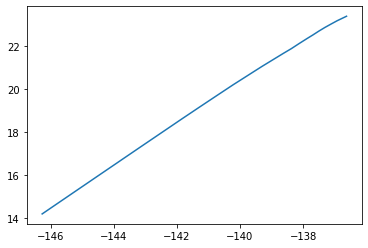

In [9]:
x = list()
y = list()
for d in data[158]:
    x.append(d[0])
    y.append(d[1])
    
plt.plot(x, y, '-')

In [10]:
from collections import defaultdict
import pandas as pd

In [16]:
data_dict = defaultdict(list)
for ped in data[5000:7000]:
    frame = 0
    for d in ped:
        data_dict['pedestrian_id'].append(1.0)
        data_dict['frame'].append(frame)
        data_dict['x'].append(d[0])
        data_dict['y'].append(d[1])
        frame += 1

In [17]:
df = pd.DataFrame(data_dict, columns=['frame', 'pedestrian_id', 'x', 'y'])

In [18]:
df.head()

,frame,pedestrian_id,x,y
0,0,1.0,-135.829,23.9785
1,1,1.0,-136.033,23.8258
2,2,1.0,-136.225,23.6894
3,3,1.0,-136.418,23.5245
4,4,1.0,-136.608,23.3648


In [19]:
df.shape

(92580, 4)

In [20]:
df.to_csv('scenario_1_ped_right.csv', index=False, header=False)